In [1]:
import pandas as pd 
import networkx as nx 
from tqdm import tqdm 
tqdm.pandas()
import matplotlib.pyplot as plt
from statistics import mean
from tqdm import tqdm 
import numpy as np 
from datetime import datetime 
import csv 
import tikzplotlib
from utils_graph import *

In [2]:
# type='undirected'
# GC = build_graph_from_csv('../data/conceptnet.en.csv', type)
# GS = build_graph_from_csv('../data/swow.en.csv', type)
dfs = pd.read_csv('../data/swow/swow.txt', names=['word'])
dfc = pd.read_csv('../data/cpnet47rel/conceptnet47rel.txt', names=['word'])

In [3]:
path = '../data/data.json'
df = pd.read_json(path)


In [4]:

df['freq'] = df['timeseries'].apply(lambda x: x[-1])
word_freq = dict(zip(df['word'], df['freq']))


In [5]:
def get_freq(word_freq):
    word_freq[x]
from operator import itemgetter
import operator

dfs['freq'] = dfs['word'].progress_apply(lambda x: word_freq.get(x, 0))

dfc['freq'] = dfc['word'].progress_apply(lambda x: word_freq.get(x, 0))

print(dfs.head())
# f = operator.itemgetter(*dfs['word'])
# freq = f(word_freq)

# print(freq[:3])
# map(word_freq, GC.nodes)

100%|██████████| 1080760/1080760 [00:01<00:00, 732281.45it/s]           word      freq
0      although  0.000115
1  nevertheless  0.000017
2           yet  0.000234
3           but  0.002360
4        though  0.000298



In [6]:
dfcs = pd.DataFrame(set(dfs['word']).intersection(set(dfc['word'])), columns=['word'])
dfs_unique = pd.DataFrame(set(dfs['word']) - (set(dfc['word'])), columns=['word'])
dfc_unique = pd.DataFrame(set(dfc['word']) - (set(dfs['word'])), columns=['word'])

dfs_unique['freq'] = dfs_unique['word'].progress_apply(lambda x: word_freq.get(x, 0))
dfc_unique['freq'] = dfc_unique['word'].progress_apply(lambda x: word_freq.get(x, 0))
print(dfc_unique['freq'].describe())

100%|██████████| 1008784/1008784 [00:01<00:00, 557538.71it/s]count    1.008784e+06
mean     4.593351e-08
std      1.171083e-06
min      0.000000e+00
25%      0.000000e+00
50%      3.463037e-10
75%      4.195440e-09
max      5.256520e-04
Name: freq, dtype: float64



In [7]:
dfh = dfc_unique 
# print(dfh)
dfm = dfh.query("freq==0")
print(f"{len(dfm.index)} ({len(dfm.index)/len(df.index)}) words are not retrieved")

dfm['word_length'] = dfm['word'].apply(lambda x : len(x.split("_")))

from collections import Counter 
print(Counter(dfm['word_length']).most_common())
plt.show()
print(dfm)

293284 (0.24372273758861712) words are not retrieved
[(1, 146782), (2, 64468), (3, 39220), (4, 28179), (5, 11043), (6, 2658), (7, 366), (8, 176), (9, 106), (10, 72), (11, 39), (12, 33), (13, 26), (14, 16), (15, 15), (17, 12), (16, 12), (18, 9), (21, 8), (19, 8), (20, 4), (23, 4), (25, 4), (27, 3), (30, 3), (22, 2), (24, 2), (36, 2), (26, 2), (29, 2), (32, 2), (31, 2), (53, 1), (33, 1), (37, 1), (34, 1)]
                               word  freq  word_length
1        baxters_common_sense_tests   0.0            4
2        culture_of_false_solutions   0.0            4
5                      block_assist   0.0            2
13                   normoglycemics   0.0            1
19             group_of_rift_valley   0.0            4
...                             ...   ...          ...
1008777               rhodous_oxide   0.0            2
1008778         darker_than_daytime   0.0            3
1008779               pachyphyllous   0.0            1
1008780               afrodiasporic   0.0  

               freq
count  1.008784e+06
mean   4.593351e-08
std    1.171083e-06
min    0.000000e+00
25%    0.000000e+00
50%    3.463037e-10
75%    4.195440e-09
max    5.256520e-04
ipykernel_launcher:11: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
ipykernel_launcher:13: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


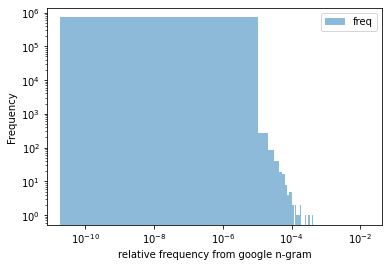

In [8]:


dfq = dfh.query("freq!=0") 

N = len(dfq.index)
fig, ax = plt.subplots()
print(dfh[['freq']].describe())
# dfq[['mean_path_len_cn', 'mean_path_len_sw']].hist(ax=ax,)
dfq[['freq']].plot(ax=ax, kind="hist", alpha=0.5, bins=50)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel("relative frequency from google n-gram")
ax.set_xlim([0, 4.183445e-02])

ax.set_xlim([0, 4.183445e-02 ])
# dfq[['edge_recall_cn', 'edge_recall_sw']].plot(kind="hist", alpha=0.5, bins=50)
plt.show()


In [9]:
print(dfc['freq'].describe())
print(dfs['freq'].describe())

count    1.080760e+06
mean     6.755994e-07
std      6.378092e-05
min      0.000000e+00
25%      0.000000e+00
50%      4.896705e-10
75%      7.032409e-09
max      4.183445e-02
Name: freq, dtype: float64
count    1.246270e+05
mean     5.889115e-06
std      1.881993e-04
min      0.000000e+00
25%      1.332251e-09
50%      5.969393e-08
75%      6.698010e-07
max      4.183445e-02
Name: freq, dtype: float64


293603 (0.2439878306495777) words are not retrieved
               freq
count  7.871570e+05
mean   9.275923e-07
std    7.473357e-05
min    1.808064e-11
25%    2.950764e-10
50%    2.020723e-09
75%    1.751523e-08
max    4.183445e-02
/home/chunhua/anaconda3/envs/allennlp/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


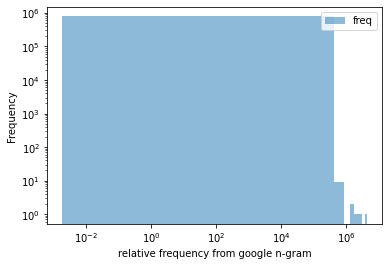

In [72]:
dfm = dfc.query("freq==0")
print(f"{len(dfm.index)} ({len(dfm.index)/len(df.index)}) words are not retrieved")

dfq = dfc.query("freq!=0") 

N = len(dfq.index)
fig, ax = plt.subplots()
print(dfq[['freq']].describe())
dfq['freq'] = dfq['freq']*1e8
# dfq[['mean_path_len_cn', 'mean_path_len_sw']].hist(ax=ax,)
dfq[['freq']].plot(ax=ax, kind="hist", alpha=0.5)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel("relative frequency from google n-gram")
# ax.set_xlim([0, 4.183445e-02])

# dfq[['edge_recall_cn', 'edge_recall_sw']].plot(kind="hist", alpha=0.5, bins=50)
plt.show()


18520 (0.015390355764859961) words are not retrieved
               freq
count  1.061070e+05
mean   6.917006e-06
std    2.039460e-04
min    1.808064e-11
25%    1.071218e-08
50%    1.251866e-07
75%    9.752465e-07
max    4.183445e-02
ipykernel_launcher:14: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


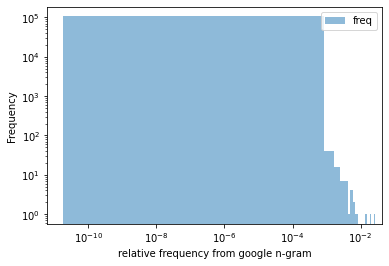

In [10]:
dfm = dfs.query("freq==0")
print(f"{len(dfm.index)} ({len(dfm.index)/len(df.index)}) words are not retrieved")

dfq = dfs.query("freq!=0") 

N = len(dfq.index)
fig, ax = plt.subplots()
print(dfq[['freq']].describe())
# dfq[['mean_path_len_cn', 'mean_path_len_sw']].hist(ax=ax,)
dfq[['freq']].plot(ax=ax, kind="hist", alpha=0.5, bins=50)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel("relative frequency from google n-gram")
ax.set_xlim([0, 4.183445e-02])

# dfq[['edge_recall_cn', 'edge_recall_sw']].plot(kind="hist", alpha=0.5, bins=50)
plt.show()


In [ ]:
Statistics 
    	CN (1080K)	    SW (124K)	    CN∩SW (71.9K)	SW Unique	    CN Unique
count  	7.87157e+05	    1.06107e+05	    7.1657e+04	    3.445e+04	    1.008784e+06
mean   	9.275923e-07	6.917006e-06	9.543015e-06	1.454833e-06	4.593351e-08
std    	7.473357e-05	2.03946e-04	    2.474926e-04	2.568789e-05	1.171083e-06
min    	1.808064e-11	1.808064e-11	1.808064e-11	1.808064e-11	0e+00
25%	    2.950764e-10	1.071218e-08	4.694897e-08	9.496691e-10	0e+00
50%	    2.020723e-09	1.251866e-07	3.052982e-07	1.068794e-08	3.463037e-10
75%	    1.751523e-08	9.752465e-07	1.701344e-06	1.029532e-07	4.19544e-09
max    	4.183445e-02	4.183445e-02	4.183445e-02	3.388963e-03	5.25652e-04
Not retrieved 	293603 (0.24)	18520 (0.0153)	318	    18201 (0.015)	    293284 (0.24)